# new Plots

In this notebook, we check my new library viewClusters

In [223]:
from astropy.table import Table, vstack
from astropy.io.fits import getdata

import matplotlib
import numpy as np

from collections import defaultdict
from matplotlib import pylab
import matplotlib.pyplot as plt

from scipy import stats
import sklearn

import scipy.stats as st

In [ ]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/scripts")

from plots import viewClusters

In [224]:
run = 'g001-rhod'
run2= 'g003-rhod'

In [225]:
vc = viewClusters()
vc.load_data(run)
vc.load_data(run2)

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00001.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00002.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles/buzzard_v2.0.0_copa_golden_00003.hdf5
outdir: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/
tile path: /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/output/tiles


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:177: RuntimeWarning: divide by zero encountered in log10


In [226]:
myperc = np.linspace(0,100.,11).astype(np.int)
mycols = ['Ngals_true','MU_TRUE','R200_true','redshift','M200_true']
mybins = []
for cols in mycols:
    mybins.append(np.nanpercentile(vc.models[run]['aux_vars'][cols],myperc))

In [227]:
# nb = np.logspace(np.log10(1.),np.log10(120.),4)
# mb = np.logspace(13.5,15.2,4)
# sb = np.linspace(10.,1300.,4)
# zb = np.linspace(0.1,1.,4)
# rb = np.linspace(0.2,2.2,4)

vc.make_bins(mybins[0],mybins[1],mybins[2],mybins[3],mybins[4])
vc.compute_bin_statstics(run)
vc.compute_bin_statstics(run2)
vc.eval_all()

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:177: RuntimeWarning: divide by zero encountered in log10


In [228]:
vc.eval_metrics(run, 'bias')
vc.eval_metrics(run, 'scatter_stdev')
vc.eval_metrics(run, 'scatter_percentile')
vc.eval_metrics(run, 'scatter_nmad')
vc.eval_metrics(run, 'outlier_frac')

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:177: RuntimeWarning: divide by zero encountered in log10


In [229]:
toto = np.array([np.nan, np.nan, 1.27240259, 5.66990273, 6.58792369])

In [230]:
get_log(toto)

array([-99.        , -99.        ,   0.10462454,   0.75357561,
         0.81874856])

In [231]:
metric_funcs = {"bias": bias_log_res,
                "scatter_stdev": fractional_error_stdev,
                "scatter_percentile": fractional_error_percentile,
                "scatter_nmad": get_sigmaNMAD,
                "outlier_frac": get_outlier_frac}

In [232]:
xcol,ycol = 'MU_TRUE', 'MU'

cols = metric_funcs.keys()
for col in cols:
    print(col)
    print(vc.metrics[run][xcol][col][ycol])
    print('\n')
    
print('nobjs:',vc.metrics[run][xcol]['nobjs'])

scatter_percentile
[0.17192645 0.48273185 0.17509462 0.29398645 0.23070756 0.26001597
 0.43764287 0.20226476 0.18525392 0.25432083]


bias
[ 0.0551107   0.05427189  0.0999026  -0.00881409  0.02398825  0.02322402
  0.03729529  0.08279139  0.08494635  0.08003846]


scatter_stdev
[0.3004832  1.18118408 0.23059451 0.4573429  0.19392041 0.39217715
 0.57559026 0.49729591 0.3570753  0.28831574]


scatter_nmad
[0.13071532 0.25149264 0.20165623 0.27670554 0.15195402 0.22062035
 0.15121614 0.10287908 0.13083264 0.18960083]


outlier_frac
[0.05263158 0.10526316 0.         0.05555556 0.         0.05263158
 0.22222222 0.10526316 0.15789474 0.05263158]


('nobjs:', array([19, 19, 19, 18, 19, 19, 18, 19, 19, 19]))


In [233]:
## colors
blue = '#2E86C1'
gray = '#A6ACAF'
red = '#A93226'

In [234]:
xbins = vc.metrics[run]['R200_true']['xbins']

In [235]:
mybins[2]

array([0.73264729, 0.83020547, 0.89493673, 0.96138954, 1.02211354,
       1.14843751, 1.24022456, 1.35334839, 1.47894822, 1.6408373 ,
       2.19860184])

In [236]:
mybins[3]

array([0.10355979, 0.20886605, 0.27606185, 0.36251464, 0.43420402,
       0.53882878, 0.5816477 , 0.647629  , 0.73574101, 0.8116847 ,
       0.89822639])

In [237]:
np.max(vc.models[run]['regressors']['R200_true'])

2.198601840492734

In [238]:
np.diff(xbins)/2

array([0.04877909, 0.03236563, 0.0332264 , 0.030362  , 0.06316199,
       0.04589352, 0.05656192, 0.06279992, 0.08094454, 0.27888227])

In [239]:
def get_binned_variables(xcol,ycol,run):
    ## get variables
    x = vc.models[run]['regressors'][xcol]
    y = vc.models[run]['predictors'][ycol]
    
    xbins = vc.metrics[run][xcol]['xbins']
    xb_err= np.diff(xbins)/2.
    yb_err= vc.metrics[run][xcol]['scatter_nmad'][ycol]
    
    xb= 0.5*(xbins[1:]+xbins[:-1])#vc.metrics[run][xcol]['xmean']
    yb= vc.metrics[run][xcol]['ymean'][ycol]
        
    xmin,xmax = 0.8*(np.min(xbins)-2*yb_err[0]), 1.2*(np.max(xbins))
    xlims = (xmin,xmax)
    
    mask  = np.logical_not(np.isnan(x)|np.isnan(y))
    x = x[mask]
    y = y[mask]
    return x,y,xb,yb,xb_err,yb_err,xlims
    
def plot_scaling_relation(xcol,ycol,run,fit=False,title='',log_scale=True):
    ## get variables
    x,y,xb,yb,xb_err,yb_err,xlims = get_binned_variables(xcol,ycol,run)
    
    ## linear fit
    linreg=lin_reg(x,y)
    
    idx = np.argsort(x)
    xt,yh = x[idx],linreg['Yhat'][idx]

    b0 = round(linreg['b0'],3)
    b1 = round(linreg['b1'],3)
    cb_u, cb_l = linreg['cb_u'], linreg['cb_l']
    
    ## Plot
    fig = plt.figure(figsize=(10,8))
    if fit:
        plt.plot(xt,yh, color="r",label='y=%.2f+%.2fx'%(b0,b1))
        plt.fill_between(xt, cb_l, cb_u, color="gray", alpha=0.25, label='_nolabel_')
        plt.plot(xt,cb_l, color="r", label='_nolabel_')
        plt.plot(xt,cb_u, color="r", label='_nolabel_')

    sc = plt.scatter(x,y,s=75, alpha=0.25, color=gray)
    plt.errorbar(xb,yb,xerr=xb_err,yerr=yb_err,color=blue,linewidth=2.,fmt='o')
    plt.plot(np.linspace(xlims[0],xlims[1]),np.linspace(xlims[0],xlims[1]),linestyle='--',color='r')
    
    if log_scale:
        xlims = np.where(xlims<1.,2.,xlims)
        plt.xscale('log')
        plt.yscale('log')

    plt.ylim(xlims)
    plt.xlim(xlims)
    
    plt.xlabel(xcol,fontsize=22)
    plt.ylabel(ycol,fontsize=22)
    plt.legend(fontsize=14)
    
    plt.title(title,fontsize=22)
    fig.tight_layout()

def lin_reg(X,Y):
    barX=np.mean(X); barY=np.mean(Y)
    XminusbarX=X-barX; YminusbarY=Y-barY
    b1=sum(XminusbarX*YminusbarY)/sum(XminusbarX**2)
    b0=barY-b1*barX
    Yhat=b0+b1*X
    e_i=Y-Yhat
    sse=np.sum(e_i**2)
    ssr=np.sum((Yhat-barY )**2)
    n=len(X)
    MSE=sse/np.float(n-2)

    s_of_yh_hat=np.sqrt(MSE*(1.0/n+(X-barX)**2/sum(XminusbarX**2)))
    W=np.sqrt(2.0*st.f.ppf(0.95,2,n-2))

    cb_upper=Yhat+W*s_of_yh_hat
    cb_lower=Yhat-W*s_of_yh_hat
    idx=np.argsort(X)

    return {'Yhat':Yhat,'b0':b0,'b1':b1,'cb_u':cb_upper[idx], 'cb_l': cb_lower[idx]}


In [240]:
def plot_scaling_relation_all(xcol,ycol,fit=False,title='',log_scale=True):
    runs = list(vc.models.keys())
    
    fig, ax = plt.subplots(3, 1, sharey='col', figsize=(10,14))
    fig.subplots_adjust(hspace=0.4,wspace=0.6)
    
    for i,run in enumerate(runs):
        plot_scaling_relation(xcol,ycol,run,axs=ax[i],fit=fit,title=title,log_scale=log_scale) 

def plot_scaling_relation(xcol,ycol,run,axs=None,fit=False,title='',log_scale=True):
    if axs is None: axs = plt.axes()

    ## get variables
    x,y,xb,yb,xb_err,yb_err,xlims = get_binned_variables(xcol,ycol,run)
    
    ## linear fit
    linreg=lin_reg(x,y)
    
    idx = np.argsort(x)
    xt,yh = x[idx],linreg['Yhat'][idx]

    b0 = round(linreg['b0'],3)
    b1 = round(linreg['b1'],3)
    cb_u, cb_l = linreg['cb_u'], linreg['cb_l']
    
    ## Plot
    if fit:
        axs.plot(xt,yh, color="r",label='y=%.2f+%.2fx'%(b0,b1))
        axs.fill_between(xt, cb_l, cb_u, color="gray", alpha=0.25, label='_nolabel_')
        axs.plot(xt,cb_l, color="r", label='_nolabel_')
        axs.plot(xt,cb_u, color="r", label='_nolabel_')

    sc = axs.scatter(x,y,s=75, alpha=0.25, color=gray)
    axs.errorbar(xb,yb,xerr=xb_err,yerr=yb_err,color=blue,linewidth=2.,fmt='o')
    axs.plot(np.linspace(xlims[0],xlims[1]),np.linspace(xlims[0],xlims[1]),linestyle='--',color='r')
    
    if log_scale:
        xlims = np.where(xlims<1.,2.,xlims)
        axs.set_xscale('log')
        axs.set_yscale('log')

    axs.set_ylim(xlims)
    axs.set_xlim(xlims)
    
    axs.set_xlabel(xcol,fontsize=22)
    axs.set_ylabel(ycol,fontsize=22)
    axs.legend(fontsize=14)
    
    axs.set_title(run,fontsize=22)
    #fig.tight_layout()

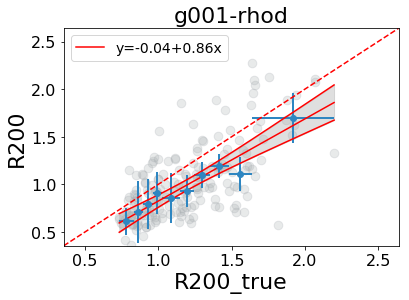

In [241]:
plot_scaling_relation('R200_true','R200',run,fit=True,log_scale=False)

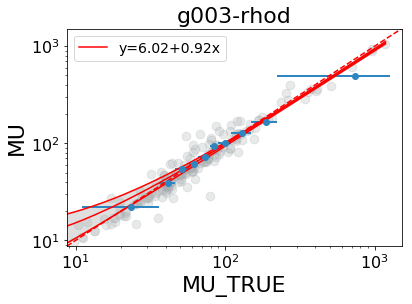

In [242]:
plot_scaling_relation(xcol,ycol,run2,fit=True)
# plot_scaling_relation(xcol,ycol,run2,fit=True)

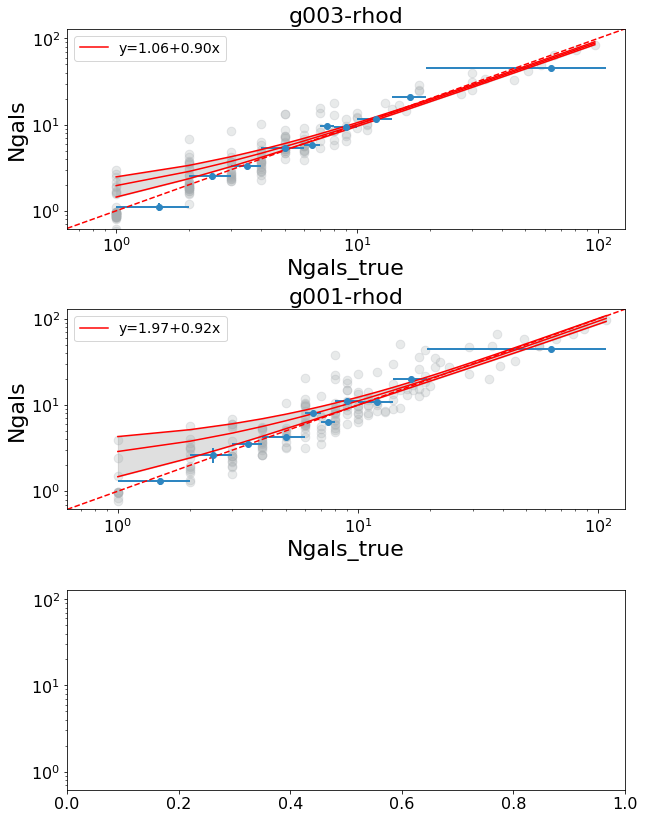

In [243]:
plot_scaling_relation_all('Ngals_true','Ngals',fit=True)

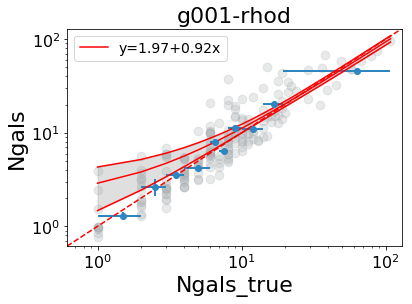

In [244]:
plot_scaling_relation('Ngals_true','Ngals',run,fit=True)

In [245]:
def get_binned_variables_res(xcol,ycol,run,metric='scatter_percentile'):
    ## get variables
    x = vc.models[run]['aux_vars'][xcol]
    y = vc.models[run]['residual'][ycol]
    
    xbins = vc.metrics[run][xcol]['xbins']
    xb_err= np.diff(xbins)/2.
    yb_err= vc.metrics[run][xcol][metric][ycol]
    
    xb= 0.5*(xbins[1:]+xbins[:-1])#vc.metrics[run][xcol]['xmean']
    yb= vc.metrics[run][xcol]['res_mean'][ycol]
        
    xmin,xmax = 0.8*(np.min(xbins)-2*yb_err[0]), 1.2*(np.max(xbins))
    xlims = (xmin,xmax)
    
    mask  = np.logical_not(np.isnan(x)|np.isnan(y))
    x = x[mask]
    y = y[mask]
    return x,y,xb,yb,xb_err,yb_err,xlims

In [246]:
scatter = []
for metric in metric_funcs.keys():
    #plt.figure(figsize=(7,5))
    print(metric)
    x,y,xb,yb,xb_err,yb_err,xlims = get_binned_variables_res('redshift','MU',run,metric=metric)
    scatter.append(yb_err)
    #plt.errorbar(xb,yb,xerr=xb_err,yerr=yb_err,color=blue,linewidth=2.,fmt='o')
    #plt.title(metric)
# plt.legend()

scatter_percentile
bias
scatter_stdev
scatter_nmad
outlier_frac


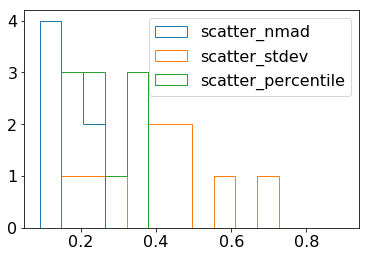

In [247]:
mybins = np.linspace(0.09,0.9,15)
_ = plt.hist(scatter[3],bins=mybins,histtype='step',label=metric_funcs.keys()[3])
_ = plt.hist(scatter[2],bins=mybins,histtype='step',label=metric_funcs.keys()[2])
_ = plt.hist(scatter[0],bins=mybins,histtype='step',label=metric_funcs.keys()[0])
plt.legend()

Text(0.5,0,'redshift')

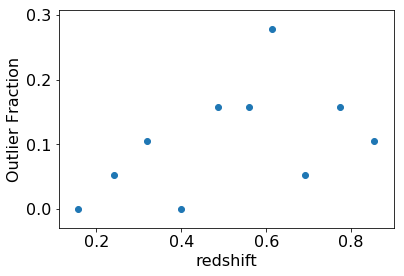

In [248]:
plt.scatter(xb,scatter[-1])
plt.ylabel('Outlier Fraction')
plt.xlabel('redshift')

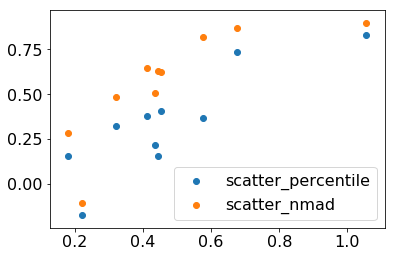

In [204]:
plt.scatter(scatter[2],(scatter[2]-scatter[0])/(scatter[2]),label=metric_funcs.keys()[0])
plt.scatter(scatter[2],(scatter[2]-scatter[3])/(scatter[2]),label=metric_funcs.keys()[3])
plt.legend()

In [160]:
def plot_residual_r200(xvar,r200_hod_mass,r200, ax=None, xlabel='redshift'):
    if ax is None: ax = plt.axes()

    xbins = splitBins(xvar)
    keys, xvarb = makeBins(xvar,xbins)
    xvarb_std = np.diff(xbins)/2

    residual = np.log10(r200_hod_mass/r200)

    residualb = np.array([np.nanmean(residual[idx]) for idx in keys])
    residualb_std = np.array([np.nanstd(residual[idx]) for idx in keys])

    ax.scatter(xvar,residual,color='#A6ACAF',alpha=0.6)
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std,color='#2E86C1',fmt='o')

    ax.set_xlabel(xlabel,fontsize=18)

array([0.12911339, 0.10856551, 0.21349531, 0.24626615, 0.08909384,
       0.16455801, 0.10521212, 0.16483107, 0.14502839, 0.16920908])

In [1]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")

from main import copacabana

class viewClusters:
    def __init__(self):
        '/home/s1/jesteves/perl5/bin'
        cfg = '/home/s1/jesteves/git/ccopa/config_files/config_buzzard_v2.yaml'
        self.copa = copacabana(cfg,dataset='buzzard_v2')

        self.models  = defaultdict(dict)
        self.metrics = defaultdict(dict)

        self.predictors = ['Ngals','MU','R200']
        self.regressors = ['Ngals_true','MU_TRUE','R200_true']
        self.aux_vars   = ['Ngals_true','MU_TRUE','R200_true','redshift','M200_true']
        
        self.npredictors = len(self.predictors)
        self.nauxialiars = len(self.aux_vars)
        
        self.metric_funcs = {"bias": bias_log_res,
                             "scatter_stdev": fractional_error_stdev,
                             "scatter_percentile": fractional_error_percentile,
                             "scatter_nmad": get_sigmaNMAD,
                             "outlier_frac": get_outlier_frac}
        pass

    def load_data(self,run_name):
        cat = self.copa.load_copa_out('cluster',run_name)
        self.df  = cat.to_pandas()
        
        self.models[run_name]['predictors'] = np.array(cat[self.predictors])
        self.models[run_name]['regressors'] = np.array(cat[self.regressors])
        self.models[run_name]['aux_vars']   = np.array(cat[self.aux_vars])
        self.compute_residuals(run_name)

    def compute_residuals(self,run_name):
        self.models[run_name]['residual']     = np.full_like(self.models[run_name]['predictors'],-99.)
        self.models[run_name]['log_residual'] = np.full_like(self.models[run_name]['predictors'],-99.)

        for colx,coly in zip(self.regressors,self.predictors):
            x = self.models[run_name]['regressors'][colx]
            y = self.models[run_name]['predictors'][coly]
            res, log_res = get_frac_residual(x,y)
            self.models[run_name]['residual'][coly] = res
            self.models[run_name]['log_residual'][coly] = log_res

    def make_bins(self, ngals_bins, mu_star_bins, r200_bins, zcls_bins, mass_bins):
        mybins             = [ngals_bins, mu_star_bins, r200_bins, zcls_bins, mass_bins]
        self.metrics['bins']= dict()
        for jj,xbin in zip(self.aux_vars,mybins):
            self.metrics['bins'][jj]  = xbin
            self.metrics['nbins'][jj] = xbin.size - 1
        
        runs = list(self.models.keys())
        for run_name in runs:
            labels,values = self._make_bins(mybins,run_name)
            self.models[run_name]['bins_idx'] = labels
            self.models[run_name]['bins_val'] = values
        
    def _make_bins(self,bins,run_name):
        labels = np.full_like(self.models[run_name]['aux_vars'],-99.)
        values = np.full_like(self.models[run_name]['aux_vars'],-99.)
        for xbin,col in zip(bins,self.aux_vars):
            x = self.models[run_name]['aux_vars'][col]
            keys,xbins = get_bins(x,xbin)
            labels[col]= keys
            values[col]= xbins
        return labels,values

    ### compute metrics
    def compute_bin_statstics(self,run_name):
        ## out: dict('xbins','xmean','nobjs')
        out = defaultdict(dict)
        self.metrics[run_name] = out
        for jj in self.aux_vars:
            id_bins = self.models[run_name]['bins_idx'][jj].astype(np.int)    
            xs_vals = self.models[run_name]['aux_vars'][jj]
            ys_true = self.models[run_name]['predictors']
            res     = self.models[run_name]['residual']
                
            nbins    = self.metrics['nbins'][jj]
            xbins    = self.metrics['bins'][jj]
            
            indices  = np.arange(nbins,dtype=np.int)
            xmean    = get_binned_mean(xs_vals,xs_vals,xbins)#0.5*(xbins[1:]+xbins[:-1])
            nobjs    = np.histogram(xs_vals,bins=xbins)[0]
            
            ymean       = np.full_like(ys_true,np.nan)[:nbins]
            resmean     = ymean.copy()
            
            for ii in self.predictors:
                ymean[ii]     = get_binned_mean(xs_vals,ys_true[ii],xbins)
                resmean[ii]   = get_binned_mean(xs_vals,res[ii],xbins)
                
            mydict   = {'bins':indices,'xbins':xbins,'xmean':xmean,'ymean':ymean,'res_mean':resmean,
                        'nobjs':nobjs}            
            self.metrics[run_name][jj] = mydict
    
    def eval_all(self):
        runs   = self.models.keys()
        metrics= self.metric_funcs.keys()
        for run_name in runs:
            for metric in metrics: self.eval_metrics(run_name, metric)
            
    def eval_metrics(self, run_name, metric):
        #error_message = f"{run_name} not yet trained"
        #assert run_name in self.models, error_message

        ys_predict = self.models[run_name]['predictors']
        ys_true    = self.models[run_name]['regressors']
        xs_vals    = self.models[run_name]['aux_vars']
        
        for jj in self.aux_vars:
            xbins   = self.metrics[run_name][jj]['xbins']
            dtypes      = [(col,'<f8') for col in self.predictors]
            scores      = np.full_like(xbins[1:],-99.,dtype=dtypes)
            for ii,kk in zip(self.predictors,self.regressors):
                scores[ii]  = self.metric_bin(metric, ys_true[kk],ys_predict[ii], xs_vals[jj], xbins)
            self.metrics[run_name][jj][metric] = scores

    def metric_bin(self,metric,ytrue,ypred,xvar,xbins):
        error_message = ('{} not recognized! options are: {}'
                         ''.format(metric, self.metric_funcs.keys()))
        assert metric in self.metric_funcs, error_message
        
        keys     = get_bins_group_indices(xvar,xbins)
        ytrue_bin= group_by(ytrue,keys)#get_bins_group(x,ytrue,xbins)
        ypred_bin= group_by(ypred,keys)#get_bins_group(x,ypred,xbins)#[ypred[idx] for idx in keys]
        
        nbins    = len(xbins)-1
        scores   = np.full_like(xbins[:-1],-99.,dtype=np.float64)
        
        for i,yt,yp in zip(range(nbins),ytrue_bin,ypred_bin):
            scores[i] = self.metric_funcs[metric](yt,yp)
        return scores
    
    def get_binned_variables(self,xcol,ycol,run,metric='scatter_nmad'):
        ## get variables
        x = self.models[run]['regressors'][xcol]
        y = self.models[run]['predictors'][ycol]
        
        xbins = self.metrics[run][xcol]['xbins']
        xb_err= np.diff(xbins)/2.
        yb_err= self.metrics[run][xcol][metric][ycol]
        
        xb= 0.5*(xbins[1:]+xbins[:-1])#self.metrics[run][xcol]['xmean']
        yb= self.metrics[run][xcol]['ymean'][ycol]
            
        xmin,xmax = 0.8*(np.min(xbins)-2*yb_err[0]), 1.2*(np.max(xbins))
        xlims = (xmin,xmax)
        
        mask  = np.logical_not(np.isnan(x)|np.isnan(y))
        x = x[mask]
        y = y[mask]
        return x,y,xb,yb,xb_err,yb_err,xlims
        
    def plot_scaling_relation(self,xcol,ycol,run,axs=None,xlims=None,metric='scatter_nmad',fit=False,title='',log_scale=True):
        ## get variables
        x,y,xb,yb,xb_err,yb_err,xlims0 = self.get_binned_variables(xcol,ycol,run,metric=metric)
        if xlims is None: xlims=xlims0
        
        _plot_scaling_relation(x,y,xb,yb,xb_err,yb_err,xlims,xcol,ycol,axs=axs,fit=fit,title=title,log_scale=log_scale)

        
def group_by(x,keys):
    return [x[idx] for idx in keys]
    
def get_bins_group_indices(x,bins):
    idx  = np.argsort(x)
    ## to avoid the boundary condition of the digitize function as xlow <= x < xup
    mybins = bins.copy()
    mybins[-1] += 0.1
    inds = np.digitize(x,mybins)
    return np.split(idx, np.unique(inds[idx], return_index=True)[1][1:])
    
def get_bins_group(x,y,bins):
    idx  = np.argsort(x)
    ## to avoid the boundary condition of the digitize function as xlow <= x < xup
    mybins = bins.copy()
    mybins[-1] += 0.1
    inds = np.digitize(x,mybins)
    return np.split(y[idx], np.unique(inds[idx], return_index=True)[1][1:])
    
def get_binned_mean(x,y,bins):
    mask  = np.logical_not(np.isnan(x)|np.isnan(y))
    sum_y = np.histogram(x[mask], bins, weights=y[mask])[0]
    nobjs = np.histogram(x[mask], bins)[0]
    return sum_y/nobjs
    
def get_bins(variable,xedges):
    nbins   = len(xedges)-1
    indices = np.full_like(variable,-99,dtype=np.int)
    xbins   = np.full_like(variable,-99,dtype=np.float)

    means = (xedges[1:]+xedges[:-1])/2.
    for i in range(nbins):
        idx = np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0]
        xbins[idx]   = means[i]
        indices[idx] = i
    return indices, xbins

def get_log(x):
    xlog = np.log10(x)
    xlog[np.isinf(xlog)] = -99
    xlog[np.isnan(xlog)] = -99
    return xlog

def get_frac_residual(x,y):
    res = y/(x+1e-6)
    log_res = get_log(res)
    return res,log_res

def mad(data, axis=None):
    return np.median(np.abs(data - np.median(data)))

def median_absolute_dev(x,y):
    res, log_res = get_frac_residual(x,y)
    return mad(res[log_res>-99])

def bias_log_res(x,y):
    res, log_res = get_frac_residual(x,y)
    mask = log_res>-99.
    return 1-10**np.median(log_res[mask])

def fractional_error_stdev(x, y):
    res, log_res = get_frac_residual(x,y)
    score = np.std(res[log_res>-99])
    return score

def fractional_error_percentile(x, y):
    res, log_res = get_frac_residual(x,y)
    mask = log_res>-99.
    p16 = np.percentile(res[mask], 16)
    p84 = np.percentile(res[mask], 84)
    score = 0.5*(p84-p16)
    return score

def get_sigmaNMAD(x,y):
    sigmaNMAD = 1.4*median_absolute_dev(x,y)
    return sigmaNMAD

def get_outlier_frac(x,y):
    res, log_res = get_frac_residual(x,y)
    sigmaNMAD = 1.4*mad(log_res[log_res>-99])
    bias      = np.nanmedian(log_res[log_res>-99])
    out       = np.where(np.abs((log_res-bias)>=3.*sigmaNMAD))[0]
    frac      = 1.*out.size/x.size
    return frac

def r2_score(x,y):
    """ returns non-aggregate version of r2 score.

    based on r2_score() function from sklearn (http://sklearn.org)
    """
    res, log_res = get_frac_residual(x,y)
    mask = log_res>-99.
    return sklearn.metrics.r2_score(x[mask],y[mask]) 


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using Modified sklearn.mixture.GMM, modified to allow data weights


In [ ]:
def plot_residual_r200(xvar,r200_hod_mass,r200, ax=None, xlabel='redshift'):
    if ax is None: ax = plt.axes()

    xbins = splitBins(xvar)
    keys, xvarb = makeBins(xvar,xbins)
    xvarb_std = np.diff(xbins)/2

    residual = np.log10(r200_hod_mass/r200)

    residualb = np.array([np.nanmean(residual[idx]) for idx in keys])
    residualb_std = np.array([np.nanstd(residual[idx]) for idx in keys])

    ax.scatter(xvar,residual,color='#A6ACAF',alpha=0.6)
    ax.errorbar(xvarb,residualb,xerr=xvarb_std,yerr=residualb_std,color='#2E86C1',fmt='o')

    ax.set_xlabel(xlabel,fontsize=18)
    # ax.set_ylabel(r'$r_{200}-r_{200,HOD}$ [Mpc $h^{-1}$]',fontsize=18)

In [ ]:
zcls2 = cat['redshift']
r200h2 = cat['R200']
r2002  = cat['R200_true']
m2002  = cat['M200_true']
n1952 = cat['Ngals_true']

fig, ax = plt.subplots(3, 1, sharey='row', figsize=(8,12))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
plot_residual_r200(zcls2,r200h2,r2002,ax=ax[0])
plot_residual_r200(n1952,r200h2,r2002,ax=ax[1],xlabel=r'$N_{true}$')
plot_residual_r200(np.log10(m2002),r200h2,r2002,ax=ax[2],xlabel=r'$\log{M_{200}}$')
# ax[0].set_ylabel(r'$r_{200,HOD}-r_{200}$ [Mpc $h^{-1}$]',fontsize=18)
fig.text(0.03, 0.5, r'$r_{200,HOD}-r_{200}$ [Mpc $h^{-1}$]', ha='center', va='center', rotation='vertical',fontsize=24)
ax[0].set_title('Copacabana Output: $m_{i}$ cut',fontsize=18)
ax[1].set_xscale('log')
plt.savefig('copacabana_r200_residual.png',bb_box='tight')
